In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
img = cv2.imread('chroma.jpg')

In [4]:
type(img)

numpy.ndarray

In [30]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

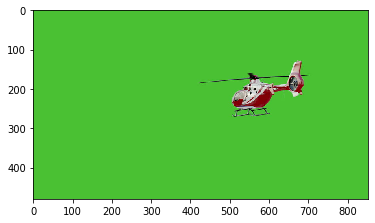

In [9]:
plt.imshow(rgb)

In [81]:
train = cv2.imread('patch2.png')

In [82]:
type(train)

numpy.ndarray

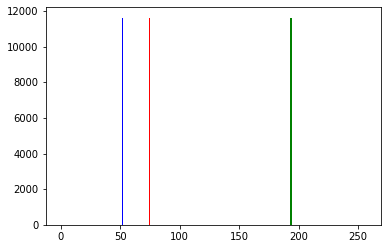

(51, 193, 74)


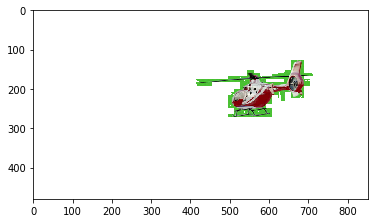

In [90]:
b, g, r = cv2.split(train)

#채널별 최댓값을 뽑아내기 위해 히스토그램을 변수에 저장
hb = plt.hist(b.ravel(), 256, [0, 256], color = 'b')
hg = plt.hist(g.ravel(), 256, [0, 256], color = 'g')
hr = plt.hist(r.ravel(), 256, [0, 256], color = 'r')

maxb = np.where(hb[0] == np.max(hb[0]))[0][0]
maxg = np.where(hg[0] == np.max(hg[0]))[0][0]
maxr = np.where(hr[0] == np.max(hr[0]))[0][0]
plt.show()

print((maxb, maxg, maxr))

test = cv2.imread("chroma.jpg")

for r in range(test.shape[0]):
    for c in range(test.shape[1]):
        if np.array_equal(test[r, c, :], [maxb, maxg, maxr]):
            test[r, c, :] = 255
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.show()

### 범위로 지정해서 다시 도전

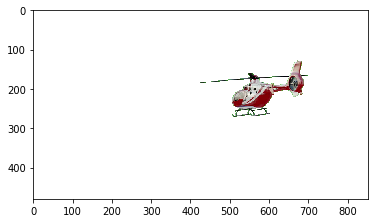

In [104]:
lower = np.array([maxb-40, maxg-40, maxr-40], dtype = 'uint8')
upper = np.array([maxb+40, maxg+40, maxr+40], dtype = 'uint8')

test = cv2.imread("chroma.jpg")

for r in range(test.shape[0]):
    for c in range(test.shape[1]):
        if (lower <= test[r, c, :]).all() and (upper >= test[r, c, :]).all():
            test[r, c, :] = 255
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.show()